In [1]:
# Import necessary packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn import svm

In [2]:
df = pd.read_csv('dataset/dataset.csv')
df.head()

,patient_id,patient_age,patient_gender,patient_tbil,patient_dbil,patient_tc,patient_tp,patient_bun,patient_ua,patient_tg,patient_alb,patient_alkp,patient_crea,patient_ckmb,patient_glu,patient_ca,patient_target
0,1,65,male,21.4,6.8,3.3,82.0,3.8,400.0,2.10,56.5,120.0,142.0,24.0,6.3,2.04,1
1,2,72,male,28.9,5.6,6.0,89.0,7.0,479.0,1.30,55.5,122.8,143.6,24.0,8.0,2.20,1
2,3,54,female,25.0,10.0,3.2,84.0,3.5,89.0,2.00,40.0,129.0,130.0,13.0,6.0,2.03,1
3,4,50,male,20.0,5.0,4.0,81.0,7.2,477.0,0.49,57.0,128.0,90.5,25.5,5.0,2.60,0
4,5,45,male,25.0,9.0,5.0,69.0,4.0,476.0,2.50,55.0,77.0,139.0,30.0,4.0,3.00,1


### Analysing Data

In [3]:
df.shape

(300, 17)

#### Datset Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patient_id      300 non-null    int64  
 1   patient_age     300 non-null    int64  
 2   patient_gender  300 non-null    object 
 3   patient_tbil    300 non-null    float64
 4   patient_dbil    300 non-null    float64
 5   patient_tc      300 non-null    float64
 6   patient_tp      300 non-null    float64
 7   patient_bun     300 non-null    float64
 8   patient_ua      300 non-null    float64
 9   patient_tg      300 non-null    float64
 10  patient_alb     300 non-null    float64
 11  patient_alkp    300 non-null    float64
 12  patient_crea    300 non-null    float64
 13  patient_ckmb    300 non-null    float64
 14  patient_glu     300 non-null    float64
 15  patient_ca      300 non-null    float64
 16  patient_target  300 non-null    int64  
dtypes: float64(13), int64(3), object(1)

#### Checking for Missing Values

Since we can't do statical operations with missing or NaN values, we have to concious about that.

In [5]:
df.isnull().sum()

patient_id        0
patient_age       0
patient_gender    0
patient_tbil      0
patient_dbil      0
patient_tc        0
patient_tp        0
patient_bun       0
patient_ua        0
patient_tg        0
patient_alb       0
patient_alkp      0
patient_crea      0
patient_ckmb      0
patient_glu       0
patient_ca        0
patient_target    0
dtype: int64

## Dataset Preprocessing

In [6]:
# We do not want patient id here for analysis
df.drop('patient_id', axis=1, inplace=True)
df.head()

,patient_age,patient_gender,patient_tbil,patient_dbil,patient_tc,patient_tp,patient_bun,patient_ua,patient_tg,patient_alb,patient_alkp,patient_crea,patient_ckmb,patient_glu,patient_ca,patient_target
0,65,male,21.4,6.8,3.3,82.0,3.8,400.0,2.10,56.5,120.0,142.0,24.0,6.3,2.04,1
1,72,male,28.9,5.6,6.0,89.0,7.0,479.0,1.30,55.5,122.8,143.6,24.0,8.0,2.20,1
2,54,female,25.0,10.0,3.2,84.0,3.5,89.0,2.00,40.0,129.0,130.0,13.0,6.0,2.03,1
3,50,male,20.0,5.0,4.0,81.0,7.2,477.0,0.49,57.0,128.0,90.5,25.5,5.0,2.60,0
4,45,male,25.0,9.0,5.0,69.0,4.0,476.0,2.50,55.0,77.0,139.0,30.0,4.0,3.00,1


In [7]:
columns = list(df.columns.values)
print("Columns = ", columns)

Columns =  ['patient_age', 'patient_gender', 'patient_tbil', 'patient_dbil', 'patient_tc', 'patient_tp', 'patient_bun', 'patient_ua', 'patient_tg', 'patient_alb', 'patient_alkp', 'patient_crea', 'patient_ckmb', 'patient_glu', 'patient_ca', 'patient_target']


In [8]:
# Creating dummy variable for patient_gender
# For one hot encoding
one_hot = pd.get_dummies(df.patient_gender).iloc[:, :]
one_hot.head()

,female,male
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1


In [9]:
df = pd.concat([df, one_hot], axis=1)
df.head()

,patient_age,patient_gender,patient_tbil,patient_dbil,patient_tc,patient_tp,patient_bun,patient_ua,patient_tg,patient_alb,patient_alkp,patient_crea,patient_ckmb,patient_glu,patient_ca,patient_target,female,male
0,65,male,21.4,6.8,3.3,82.0,3.8,400.0,2.10,56.5,120.0,142.0,24.0,6.3,2.04,1,0,1
1,72,male,28.9,5.6,6.0,89.0,7.0,479.0,1.30,55.5,122.8,143.6,24.0,8.0,2.20,1,0,1
2,54,female,25.0,10.0,3.2,84.0,3.5,89.0,2.00,40.0,129.0,130.0,13.0,6.0,2.03,1,1,0
3,50,male,20.0,5.0,4.0,81.0,7.2,477.0,0.49,57.0,128.0,90.5,25.5,5.0,2.60,0,0,1
4,45,male,25.0,9.0,5.0,69.0,4.0,476.0,2.50,55.0,77.0,139.0,30.0,4.0,3.00,1,0,1


In [10]:
# Since we one hot encoded we do not want that column anymore
df.drop('patient_gender', axis=1, inplace=True)
df.head()

,patient_age,patient_tbil,patient_dbil,patient_tc,patient_tp,patient_bun,patient_ua,patient_tg,patient_alb,patient_alkp,patient_crea,patient_ckmb,patient_glu,patient_ca,patient_target,female,male
0,65,21.4,6.8,3.3,82.0,3.8,400.0,2.10,56.5,120.0,142.0,24.0,6.3,2.04,1,0,1
1,72,28.9,5.6,6.0,89.0,7.0,479.0,1.30,55.5,122.8,143.6,24.0,8.0,2.20,1,0,1
2,54,25.0,10.0,3.2,84.0,3.5,89.0,2.00,40.0,129.0,130.0,13.0,6.0,2.03,1,1,0
3,50,20.0,5.0,4.0,81.0,7.2,477.0,0.49,57.0,128.0,90.5,25.5,5.0,2.60,0,0,1
4,45,25.0,9.0,5.0,69.0,4.0,476.0,2.50,55.0,77.0,139.0,30.0,4.0,3.00,1,0,1


In [11]:
# Now we have to rearrange our columns to get the target as last column
df = df[['patient_age', 'female', 'male', 'patient_tbil', 'patient_dbil', 'patient_tc', 'patient_tp', 'patient_bun', 'patient_ua', 'patient_tg', 'patient_alb', 'patient_alkp', 'patient_crea', 'patient_ckmb', 'patient_glu', 'patient_ca', 'patient_target']]
df.head() # Check whether evrything worked as we expected

,patient_age,female,male,patient_tbil,patient_dbil,patient_tc,patient_tp,patient_bun,patient_ua,patient_tg,patient_alb,patient_alkp,patient_crea,patient_ckmb,patient_glu,patient_ca,patient_target
0,65,0,1,21.4,6.8,3.3,82.0,3.8,400.0,2.10,56.5,120.0,142.0,24.0,6.3,2.04,1
1,72,0,1,28.9,5.6,6.0,89.0,7.0,479.0,1.30,55.5,122.8,143.6,24.0,8.0,2.20,1
2,54,1,0,25.0,10.0,3.2,84.0,3.5,89.0,2.00,40.0,129.0,130.0,13.0,6.0,2.03,1
3,50,0,1,20.0,5.0,4.0,81.0,7.2,477.0,0.49,57.0,128.0,90.5,25.5,5.0,2.60,0
4,45,0,1,25.0,9.0,5.0,69.0,4.0,476.0,2.50,55.0,77.0,139.0,30.0,4.0,3.00,1


## Data Visualization

References:
1. [Statistical Methods for Machine Learning](https://b-ok.cc/book/5220424/662bb3) by Jason Brownlee [Refer chapter 12 to know about correlation, page 97]
2. [Machine Learning Mastery with Python](https://b-ok.cc/book/5206515/11b07b) by Jason Brownlee [Refer page 35, 41-44]

#### Correlation Heatmap

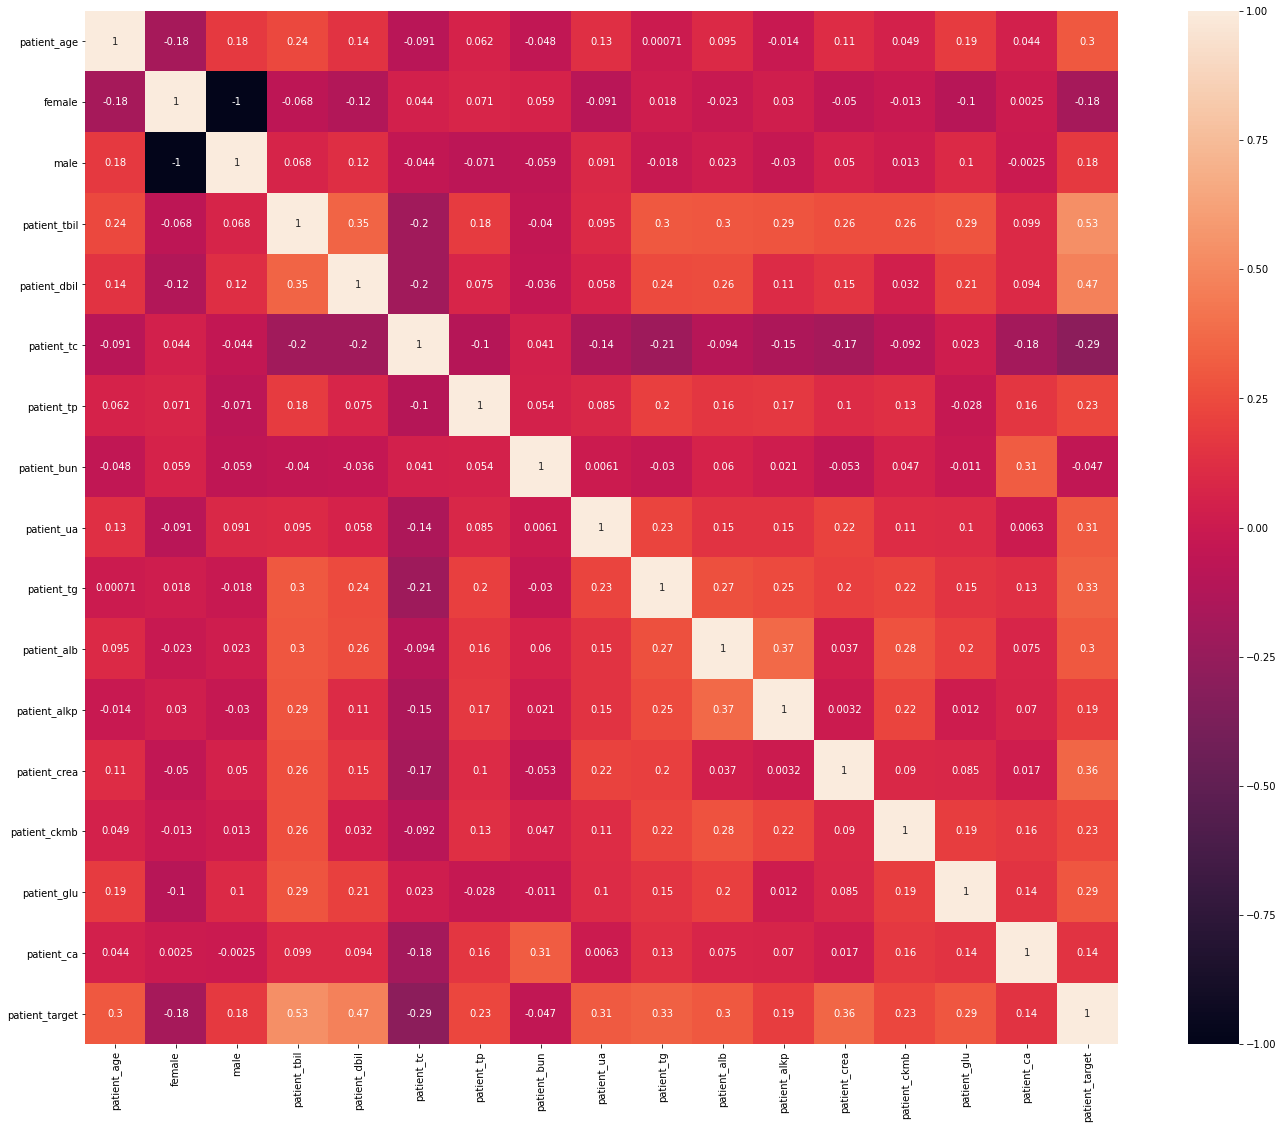

In [12]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(25,19))
sns.heatmap(corrmat, square=True, annot = True, annot_kws={'size':10})

#### Check Whether Data is balanced or not?

Text(0, 0.5, 'Number Of Patients')

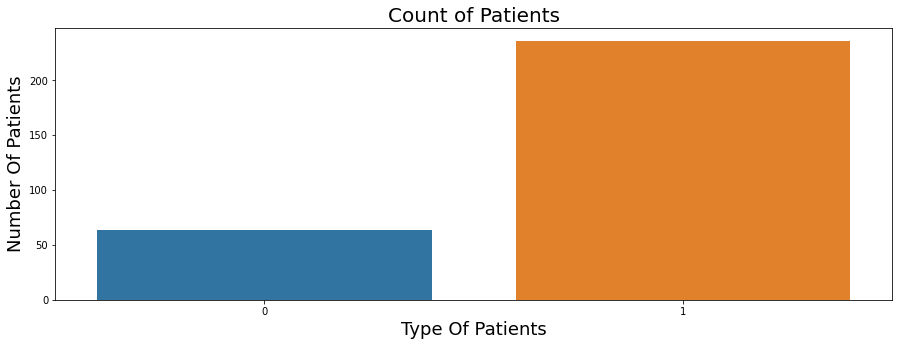

In [13]:
plt.figure(figsize=(15,5))
sns.countplot(x='patient_target',data=df)
plt.title("Count of Patients",fontsize=20)
plt.xlabel("Type Of Patients",fontsize=18)
plt.ylabel("Number Of Patients",fontsize=18)

#### Percentage of patients

In [14]:
print("Percent Of Patients:  {:.2f} %".format(len(df[df['patient_target']==1])/len(df['patient_target'])*100))
print("Percent Of Healthy peoples: {:.2f} %".format(len(df[df['patient_target']==0])/len(df['patient_target'])*100))

Percent Of Patients:  78.67 %
Percent Of Healthy peoples: 21.33 %


#### Viewing Data Description in each percentile

In [15]:
df.describe()

,patient_age,female,male,patient_tbil,patient_dbil,patient_tc,patient_tp,patient_bun,patient_ua,patient_tg,patient_alb,patient_alkp,patient_crea,patient_ckmb,patient_glu,patient_ca,patient_target
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,69.583333,0.323333,0.676667,30.599333,9.283533,3.777733,80.290200,6.911367,432.433000,1.863700,53.817667,117.614333,143.332667,22.265667,11.603367,2.687967,0.786667
std,16.215204,0.468530,0.468530,14.096360,5.691726,1.944348,8.087172,5.208384,93.181723,1.078141,9.777791,32.366629,34.530143,9.855545,8.116414,0.686802,0.410346
min,23.000000,0.000000,0.000000,2.600000,0.110000,0.230000,40.000000,0.800000,89.000000,0.450000,31.000000,53.000000,53.000000,0.500000,4.000000,2.000000,0.000000
25%,57.000000,0.000000,0.000000,20.800000,5.800000,2.075000,74.275000,5.375000,422.000000,1.100000,47.625000,112.000000,138.600000,15.225000,6.100000,2.257500,1.000000
50%,70.000000,0.000000,1.000000,28.900000,8.200000,3.600000,80.250000,7.000000,470.200000,1.680000,55.000000,122.450000,148.350000,22.550000,8.900000,2.510000,1.000000
75%,82.250000,1.000000,1.000000,35.825000,12.000000,5.425000,87.000000,7.800000,479.900000,2.300000,59.000000,131.125000,158.125000,27.700000,16.000000,2.900000,1.000000
max,99.000000,1.000000,1.000000,89.800000,55.000000,8.900000,102.000000,90.900000,765.000000,6.000000,99.000000,345.000000,522.000000,60.000000,76.000000,6.500000,1.000000


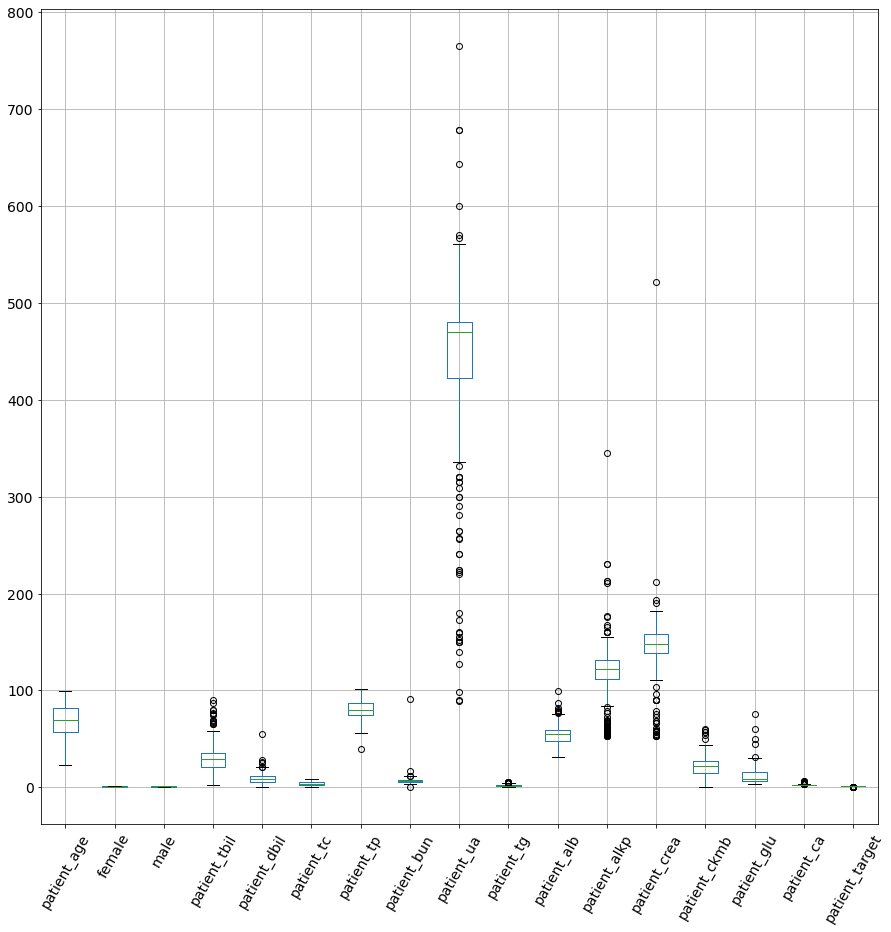

In [16]:
# Above data on each percentile can be better understand from  Box and Whisker Plots or boxplots for short.
# From the data we can say that each variable in data has lots of difference. So standard scaling is required.
new_columns = ['patient_age', 'female', 'male', 'patient_tbil', 'patient_dbil', 'patient_tc', 'patient_tp', 'patient_bun', 'patient_ua', 'patient_tg', 'patient_alb', 'patient_alkp', 'patient_crea', 'patient_ckmb', 'patient_glu', 'patient_ca', 'patient_target']
boxplot = df.boxplot(column=new_columns, figsize=(15,15), fontsize=14, rot=60)

#### Viewing Patient Count by Age

* From the data shown below you can say that the stroke has relationship between age.
* The cases of stroke is lesser before age 44.
* Most of the patients have age more than 50

Text(0, 0.5, 'Number of Patients')

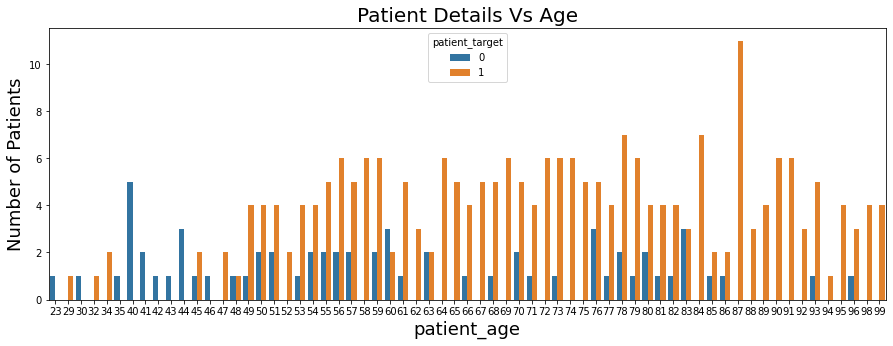

In [17]:
plt.figure(figsize=(15,5))
plt.title("Patient Details Vs Age",fontsize=20)
plt.xlabel("Age of Patient",fontsize=18)

sns.countplot(df['patient_age'],hue='patient_target',data=df)

plt.ylabel("Number of Patients",fontsize=18)

<sapn style="color: red">Is it better to use scatter plot </span>

## Bulding ML Model

In [18]:
# Training data do not contains any headers or target values.
# So convert entire dataset to numpy array
array = df.values

In [19]:
# As we said earlier Training data do not contains any headers or target values
# So just slice the numpy array
X = array[:,0:16]
print(X.shape)
# checking whether everything working fine by taking fist row of our data
X[0]

(300, 16)


array([ 65.  ,   0.  ,   1.  ,  21.4 ,   6.8 ,   3.3 ,  82.  ,   3.8 ,
       400.  ,   2.1 ,  56.5 , 120.  , 142.  ,  24.  ,   6.3 ,   2.04])

In [20]:
# Then create our test data. Test data contains only target values
Y = array[:,16]
# checking whether everything working fine by printing target column
# Y

In [21]:
# Splitting data for training and validation
validation_size = 0.20
seed = 3
scoring = 'accuracy'
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, shuffle=True, random_state=seed)
# Standard Scaler is applied because the difference between each value is higher. i.e, values are not scaled
# sc_X = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_validation = sc_X.transform(X_validation)

In [22]:
# SVM classifier
clf_svm = svm.SVC()
clf_knn = KNeighborsClassifier(n_neighbors = 17, metric = 'minkowski', p = 2)

In [23]:
# K_Fold cross validation
kfold = KFold(n_splits=5, random_state=seed)
cv_results = cross_val_score(clf_svm, X_train, Y_train, cv=kfold, scoring=scoring)
msg = "%s: %f (%f)" % ('SVM-SVC: ', cv_results.mean(), cv_results.std())
print(msg)

cv_results = cross_val_score(clf_knn, X_train, Y_train, cv=kfold, scoring=scoring)
msg = "%s: %f (%f)" % ('K-Nearest Neighbour', cv_results.mean(), cv_results.std())
print(msg)

SVM-SVC: : 0.808333 (0.033333)
K-Nearest Neighbour: 0.845833 (0.046771)


/home/arun/Documents/Project/StrokeDetection/venv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [24]:
print("******************** SVM Classifier Results *********************")
clf_svm.fit(X_train, Y_train)
predictions = clf_svm.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
print("******************** KNN Classifier Results *********************")
clf_knn.fit(X_train, Y_train)
predictions = clf_svm.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

******************** SVM Classifier Results *********************
0.7
[[ 0 18]
 [ 0 42]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        18
         1.0       0.70      1.00      0.82        42

    accuracy                           0.70        60
   macro avg       0.35      0.50      0.41        60
weighted avg       0.49      0.70      0.58        60

******************** KNN Classifier Results *********************
0.7
[[ 0 18]
 [ 0 42]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        18
         1.0       0.70      1.00      0.82        42

    accuracy                           0.70        60
   macro avg       0.35      0.50      0.41        60
weighted avg       0.49      0.70      0.58        60



/home/arun/Documents/Project/StrokeDetection/venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/arun/Documents/Project/StrokeDetection/venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Test from keyboard

In [25]:
patient_age = input("Enter Age: ")
gender = input("Enter Gender: ")
patient_tbil = input("Enter tbil: ")
patient_dbil = input("Enter dbil: ")
patient_tc = input("Enter tc: ")
patient_tp = input("Enter tp: ")
patient_bun = input("Enter bun: ")
patient_ua = input("Enter ua: ")
patient_tg = input("Enter tg: ")
patient_alb = input("Enter alb: ")
patient_alkp = input("Enter alkp: ")
patient_crea = input("Enter crea: ")
patient_ckmb = input("Enter ckmb ")
patient_glu = input("Enter glu: ")
patient_ca = input("Enter ca: ")
if gender == "Male":
    Male = '1'
    Female = '0'
else:
    Male = '0'
    Female = '1'
make_2d = []
test_data = [patient_age, Male, Female, patient_tbil, patient_dbil, patient_tc, patient_tp, 
              patient_bun, patient_ua, patient_tg, patient_alb, patient_alkp, patient_crea,
             patient_ckmb, patient_glu, patient_ca]
print(test_data)
make_2d.append(test_data)
test_array = np.array(make_2d).astype(float)
print("Actual Testing data: ", test_array)
# test_array = sc_X.fit_transform(test_array)
# print("test array after standard scling: ", test_array)
predictions = clf_knn.predict(test_array)
print(predictions)

Enter Age: 20
Enter Gender: Male
Enter tbil: 20
Enter dbil: 3.4
Enter tc: 5.9
Enter tp: 71.4
Enter bun: 7.3
Enter ua: 456
Enter tg: 1.4
Enter alb: 51
Enter alkp: 113
Enter crea: 138.4
Enter ckmb 24
Enter glu: 4.5
Enter ca: 2.5
['20', '1', '0', '20', '3.4', '5.9', '71.4', '7.3', '456', '1.4', '51', '113', '138.4', '24', '4.5', '2.5']
Actual Testing data:  [[ 20.    1.    0.   20.    3.4   5.9  71.4   7.3 456.    1.4  51.  113.
  138.4  24.    4.5   2.5]]
[0.]


## What is the warning Shown above

The above warning is an evidence that our data for preparing model is too small. ie., why the confusion matrix give you TruePositive(TP), TrueNegative(TN), FalsePositive(FP), as well Falsenegative(FN) values.
Check out the [github repo](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/metrics/_classification.py) of scikit learn. Carefully read first few lines, then you will get from where the exception is raise.
For clarity:
$$F1 = 2 \times \frac{(precision \times recall)}{(precision + recall)}$$
But precision is:
$$precision = \frac{TP}{(TP+FP)} $$
if the predictor doesn't predict positive class overall, then precision is 0
$$recall = \frac{TP}{(TP+FN)}$$
But if the predictor doesn't predict positive class - TP is 0 - recall is 0. Finally, you are dividing 0/0.
Reference: 
1. Machine Learning Maestrey by Jason Brownlee
2. https://machinelearningmastery.com/confusion-matrix-machine-learning/
3. https://github.com/RasaHQ/rasa/issues/150
4. https://intellipaat.com/community/4608/why-does-scikitlearn-says-f1-score-is-ill-defined-with-fn-bigger-than-0

## Most of the references are from Following Books:
1. [Machine Learning Maestrey](https://b-ok.cc/book/5206515/11b07b) with python by Jason Brownlee
2. [Statistical Methods for Machine Learning](https://b-ok.cc/book/5220424/662bb3) by Jason Brownlee 
3. [Statistics For Machine Learning](https://b-ok.cc/book/3555108/d84346): Pratap Dangeti